In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from code.fasttext.embedding_utils import TableEncoder, compare_embeddings_of, show_most_similar_rows

In [4]:
stadium_df = pd.read_csv(
    '/home/giovanni/unimore/TESI/src/data/uk_football/List_of_football_stadiums_in_England_1.csv'
)
pl1_df = pd.read_csv(
    '/home/giovanni/unimore/TESI/src/data/uk_football/Premier_League_1.csv'
)

In [5]:
stadium_df.dropna(axis='columns', how='all', inplace=True)
pl1_df.dropna(axis='columns', how='all', inplace=True)

In [6]:
tabenc = TableEncoder()

## Comparing Columns

In [7]:
def round_to(n, precision):
    if n >= 0 or n < 0:
        correction = 0.5 if n >= 0 else -0.5
        return int(n / precision + correction) * precision
    else:
        return n

def round_to_05(n):
    return float(format(round_to(n, 0.05), ".2f"))

In [8]:
mc = pd.merge(
        pd.merge(
        compare_embeddings_of(stadium_df, pl1_df, tabenc, 'columns'),
        compare_embeddings_of(stadium_df, pl1_df, tabenc, 'columns', add_label=True),
        on=['C1', 'C2'],
        suffixes=['', '-wlabel']
    ),
    compare_embeddings_of(stadium_df, pl1_df, tabenc, 'columns', keepnumbers=False),
    on=['C1', 'C2'],
    suffixes=['', '-nonum']
)
mc['delta1'] = (mc['cosine similarity'] - mc['cosine similarity-wlabel']).apply(lambda x: format(x, ".3f"))
mc['delta2'] = (mc['cosine similarity'] - mc['cosine similarity-nonum']).apply(lambda x: format(x, ".3f"))

In [9]:
pd.concat([mc.head(), mc.tail()])

,C1,C2,cosine similarity,cosine similarity-wlabel,cosine similarity-nonum,delta1,delta2
0,Stadium,Stadium,0.973824,0.97146,0.973984,0.002,-0.000
1,Capacity,Capacity,0.970957,0.970664,<NA>,0.000,nan
2,Town / City,Location,0.941814,0.940012,0.941814,0.002,0.000
3,Team,Team,0.911942,0.910833,0.911942,0.001,0.000
4,Rank (England only),Capacity,0.850256,0.849961,<NA>,0.000,nan
19,Rank (England only),Stadium,0.095262,0.090614,0.095262,0.005,0.000
20,Rank (England only),Location,0.08983,0.092072,0.08983,-0.002,0.000
21,Capacity,Stadium,0.086786,0.081897,<NA>,0.005,nan
22,Capacity,Team,0.072298,0.079158,<NA>,-0.007,nan
23,Rank (England only),Team,0.027893,0.039911,0.027893,-0.012,0.000


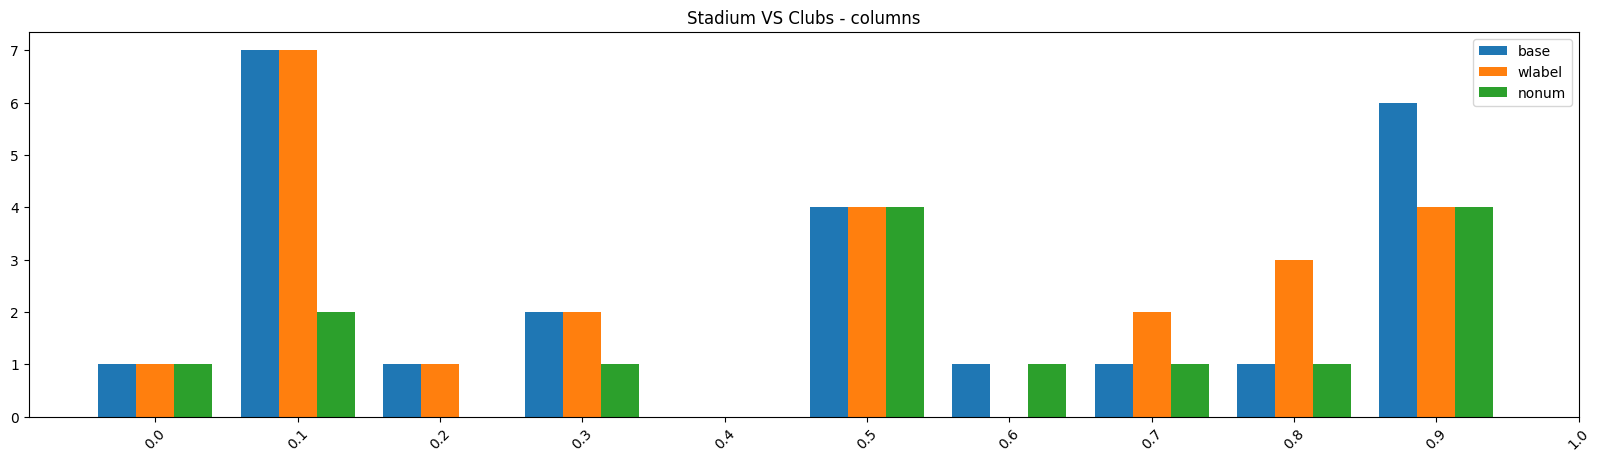

In [12]:
plt.figure(figsize=(20, 5))
prec = 0.1
bins = np.arange(0, 1.01, prec)

plt.hist(
    [
        mc['cosine similarity'].apply(round_to, args=(prec,)),
        mc['cosine similarity-wlabel'].apply(round_to, args=(prec,)),
        mc['cosine similarity-nonum'].apply(round_to, args=(prec,))
    ],
    bins=bins,
    label=['base', 'wlabel', 'nonum'],
    align='left'
)
plt.xticks(bins, rotation=45)
plt.legend()
plt.title('Stadium VS Clubs - columns')
plt.show()

Some columns disappear from the graph when we exclude numbers in tokenization since they cannot be embedded anymore.

However, in this case it seems that the situation is keep stable among the three variants, except for a general reduction when we exclude numbers.

## Comparing Rows

In [14]:
mr = pd.merge(
        pd.merge(
        compare_embeddings_of(stadium_df, pl1_df, tabenc, 'rows'),
        compare_embeddings_of(stadium_df, pl1_df, tabenc, 'rows', add_label=True),
        on=['R1', 'R2'],
        suffixes=['', '-wlabel']
    ),
    compare_embeddings_of(stadium_df, pl1_df, tabenc, 'rows', keepnumbers=False),
    on=['R1', 'R2'],
    suffixes=['', '-nonum']
)
mr['delta1'] = (mr['cosine similarity'] - mr['cosine similarity-wlabel']).apply(lambda x: format(x, ".3f"))
mr['delta2'] = (mr['cosine similarity'] - mr['cosine similarity-nonum']).apply(lambda x: format(x, ".3f"))

In [19]:
mr

,R1,R2,cosine similarity,cosine similarity-wlabel,cosine similarity-nonum,delta1,delta2
0,6,12,0.937154,0.92507,0.510893,0.012,0.426
1,3,18,0.928626,0.929903,0.666386,-0.001,0.262
2,7,14,0.928158,0.921257,0.685235,0.007,0.243
3,57,3,0.925535,0.917098,0.432279,0.008,0.493
4,23,19,0.922911,0.904293,0.283831,0.019,0.639
...,...,...,...,...,...,...,...
2935,81,13,0.585557,0.727049,0.189695,-0.141,0.396
2936,37,13,0.584359,0.723816,0.171827,-0.139,0.413
2937,53,13,0.579996,0.712215,0.21649,-0.132,0.364
2938,73,10,0.571674,0.713157,0.069516,-0.141,0.502


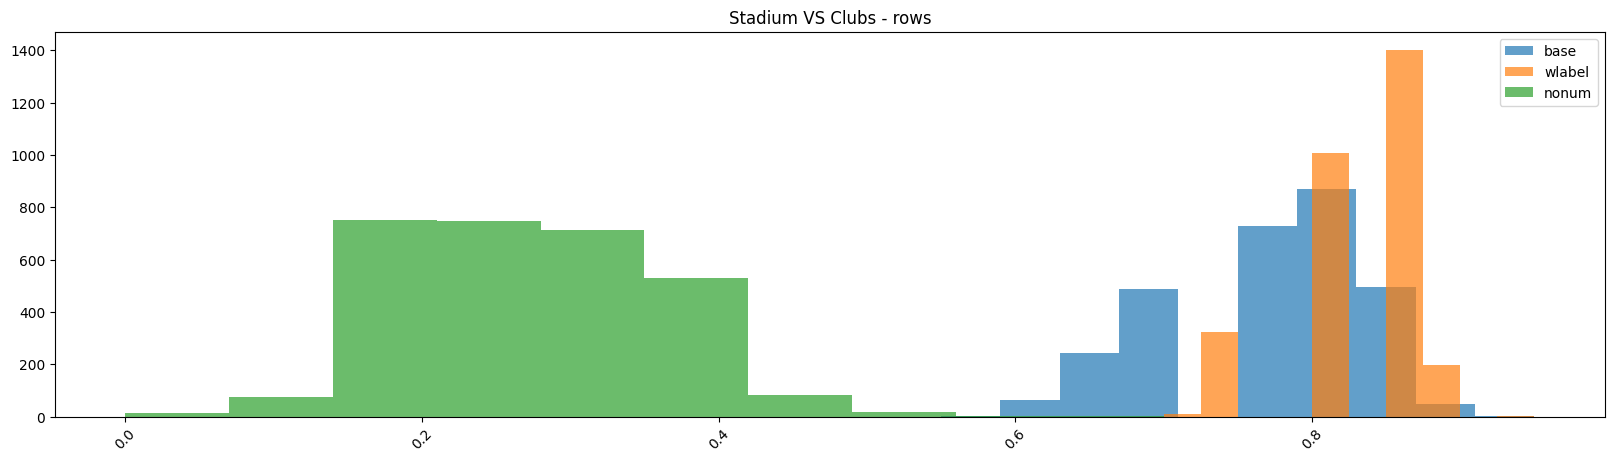

In [16]:
plt.figure(figsize=(20, 5))
prec = 0.05
plt.hist(mr['cosine similarity'].apply(         round_to, args=(prec,)).values, label='base',   bins=10, alpha=.7)
plt.hist(mr['cosine similarity-wlabel'].apply(  round_to, args=(prec,)).values, label='wlabel', bins=10, alpha=.7)
plt.hist(mr['cosine similarity-nonum'].apply(   round_to, args=(prec,)).values, label='nonum',  bins=10, alpha=.7)

plt.xticks(rotation=45)
plt.title('Stadium VS Clubs - rows')
plt.legend()
plt.show()